# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.metrics import mean_squared_error

# Import Data

In [31]:
df = pd.read_csv('AEP_hourly.csv')

In [32]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [33]:
df.dtypes

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object

In [6]:
#df = df.set_index('Datetime')

In [7]:
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [8]:
df = df.sort_values('Datetime')

In [9]:
# df = df.tail(1000)

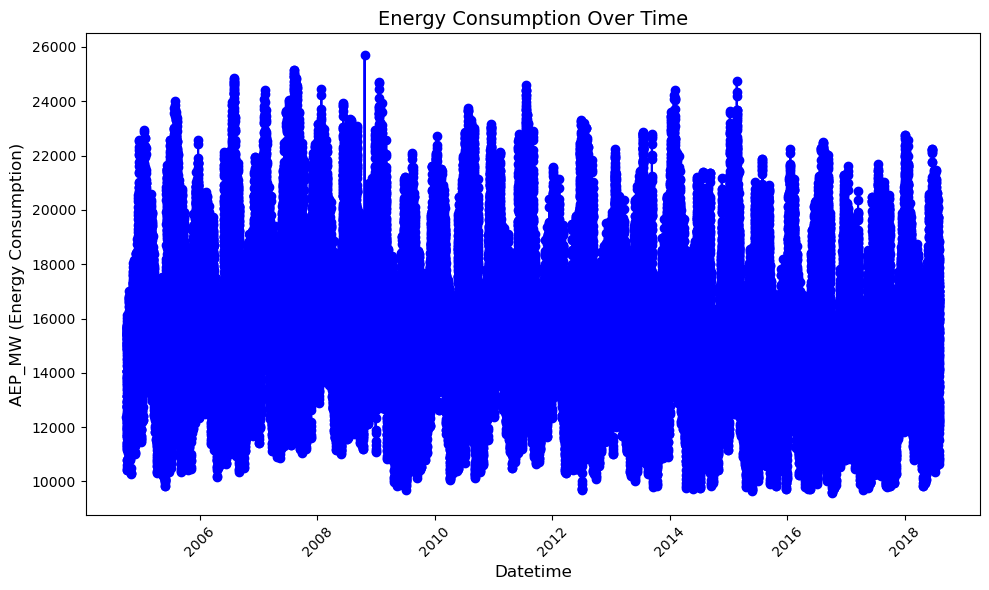

In [10]:
plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df['Datetime'], df['AEP_MW'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

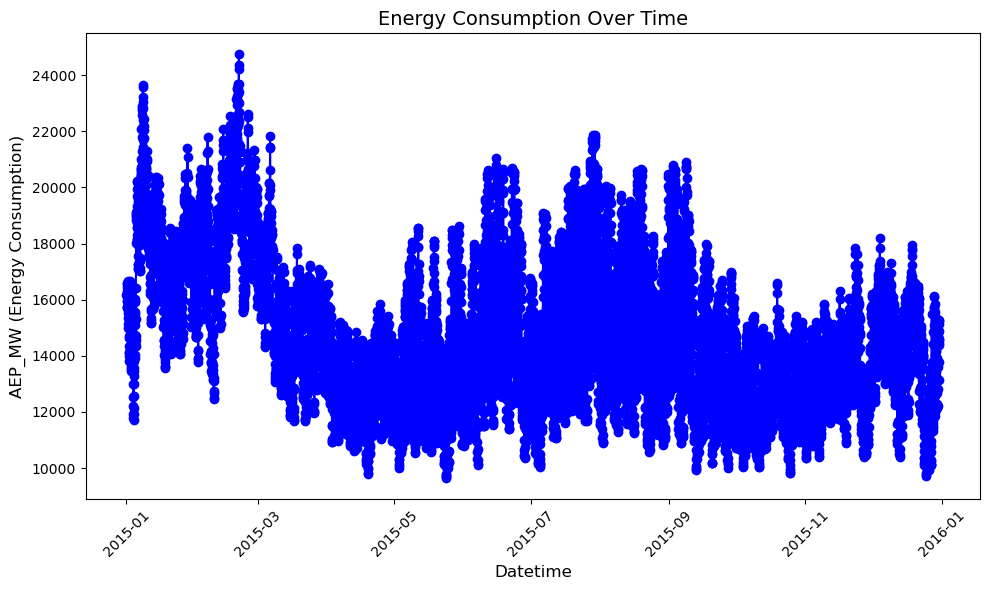

In [11]:
df_1year = df.loc[(df['Datetime']>'01-01-2015') & (df['Datetime']<='12-31-2015')]

plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df_1year['Datetime'], df_1year['AEP_MW'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

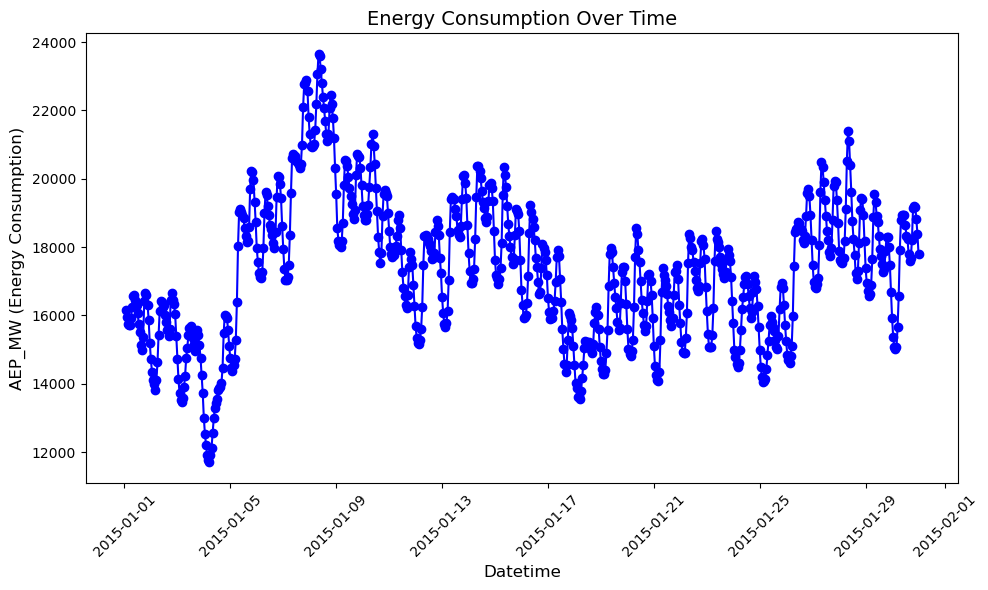

In [12]:
df_1month = df.loc[(df['Datetime']>'01-01-2015') & (df['Datetime']<='01-31-2015')]

plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df_1month['Datetime'], df_1month['AEP_MW'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

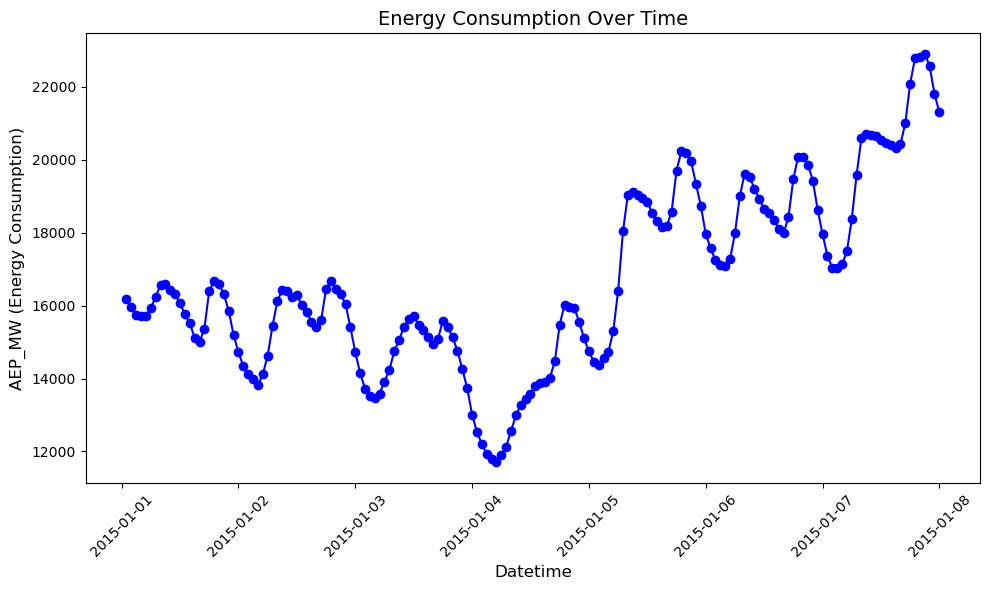

In [13]:
df_1week = df.loc[(df['Datetime']>'01-01-2015') & (df['Datetime']<='01-08-2015')]

plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df_1week['Datetime'], df_1week['AEP_MW'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Train Test Split

In [83]:
# train = df[df['Datetime'] < '01-01-2015']
train = df.loc[df['Datetime'] < '01-01-2015'].copy()

# test = df[df['Datetime'] >= '01-01-2015']
test = df.loc[df['Datetime'] >= '01-01-2015'].copy()

In [15]:
train

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
81093,2014-12-31 19:00:00,18161.0
81094,2014-12-31 20:00:00,17865.0
81095,2014-12-31 21:00:00,17568.0
81096,2014-12-31 22:00:00,17295.0


In [16]:
test

,Datetime,AEP_MW
81098,2015-01-01 00:00:00,16375.0
98570,2015-01-01 01:00:00,16172.0
98571,2015-01-01 02:00:00,15968.0
98572,2015-01-01 03:00:00,15749.0
98573,2015-01-01 04:00:00,15727.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


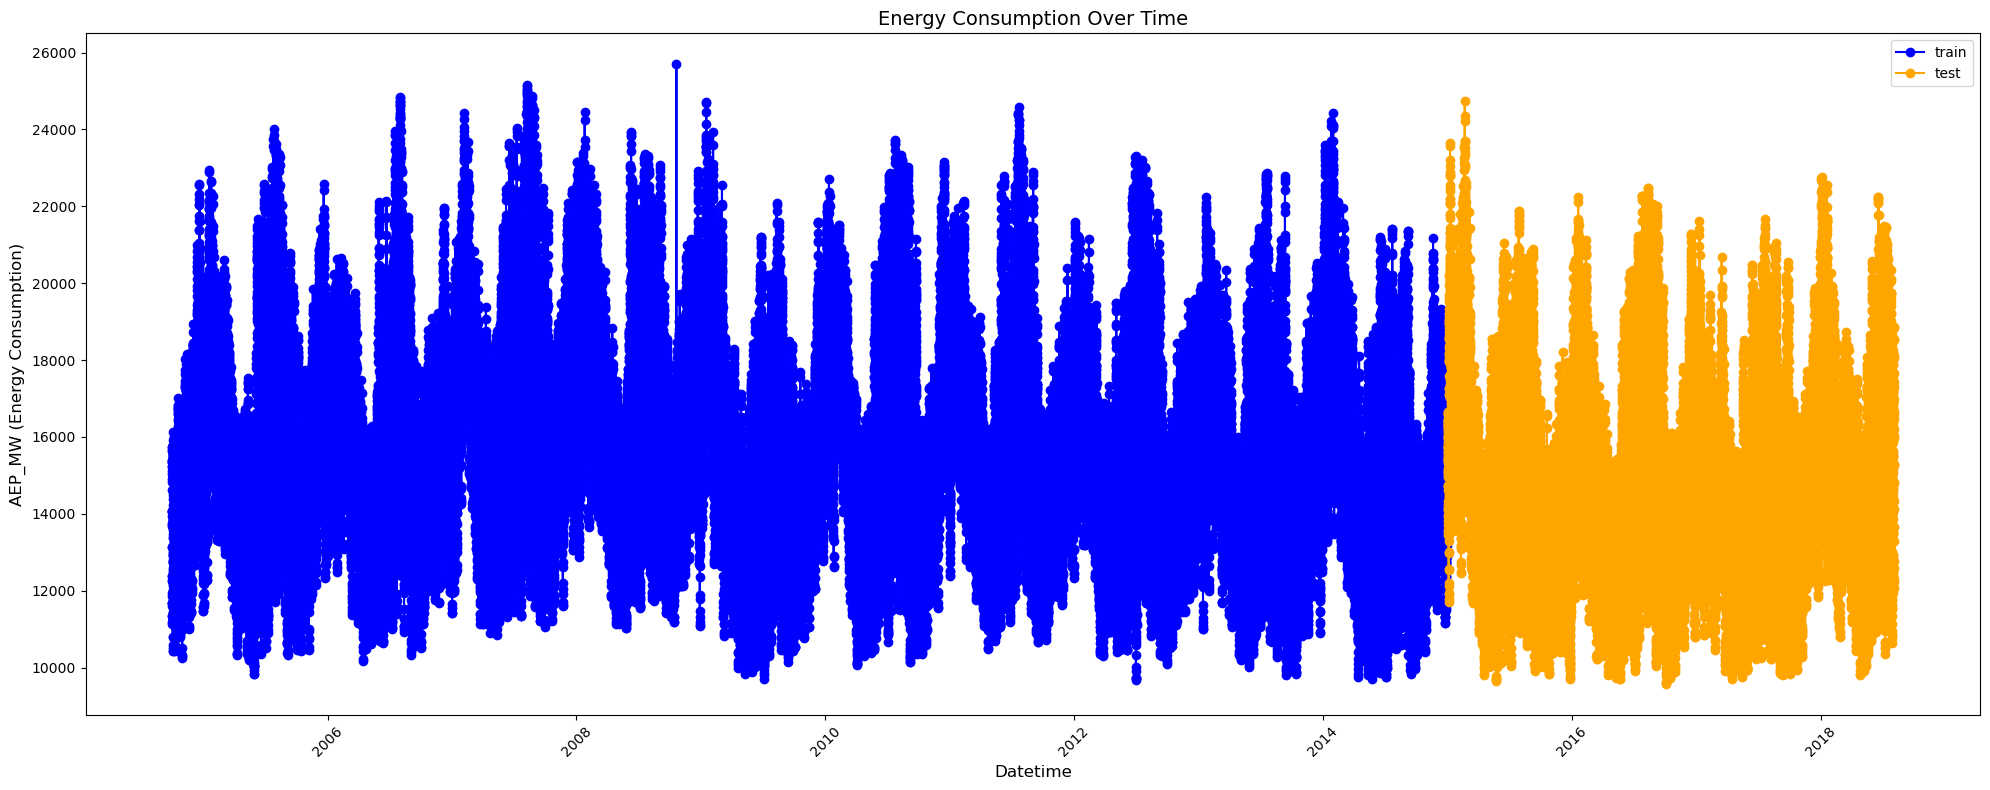

In [17]:
plt.figure(figsize=(20, 8))

# Plotting the time series
plt.plot(train['Datetime'], train['AEP_MW'], marker='o', linestyle='-', color='blue', label='train')
plt.plot(test['Datetime'], test['AEP_MW'], marker = 'o', linestyle='-', color='orange', label='test')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
train.describe()

,Datetime,AEP_MW
count,89833,89833.000000
mean,2009-11-16 00:21:13.643315968,15741.943261
min,2004-10-01 01:00:00,9669.000000
25%,2007-04-25 01:00:00,13895.000000
50%,2009-11-16 00:00:00,15565.000000
75%,2012-06-09 00:00:00,17413.000000
max,2014-12-31 23:00:00,25695.000000
std,NaN,2573.430199


In [19]:
test.describe()

,Datetime,AEP_MW
count,31440,31440.000000
mean,2016-10-17 00:09:19.923664128,14806.823728
min,2015-01-01 00:00:00,9581.000000
25%,2015-11-24 11:45:00,12973.000000
50%,2016-10-17 00:30:00,14467.000000
75%,2017-09-09 12:15:00,16385.250000
max,2018-08-03 00:00:00,24739.000000
std,NaN,2516.539903


# Feature Creation

In [20]:
def create_features(df):
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek # monday = 0 , sunday = 6
    df['quarter'] = df['Datetime'].dt.quarter
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear

    return df

In [21]:
df = create_features(df)

In [22]:
df

,Datetime,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
2183,2004-10-01 01:00:00,12379.0,1,4,4,10,2004,275
2184,2004-10-01 02:00:00,11935.0,2,4,4,10,2004,275
2185,2004-10-01 03:00:00,11692.0,3,4,4,10,2004,275
2186,2004-10-01 04:00:00,11597.0,4,4,4,10,2004,275
2187,2004-10-01 05:00:00,11681.0,5,4,4,10,2004,275
...,...,...,...,...,...,...,...,...
116157,2018-08-02 20:00:00,17673.0,20,3,3,8,2018,214
116158,2018-08-02 21:00:00,17303.0,21,3,3,8,2018,214
116159,2018-08-02 22:00:00,17001.0,22,3,3,8,2018,214
116160,2018-08-02 23:00:00,15964.0,23,3,3,8,2018,214


# Visualize feature to target relationship

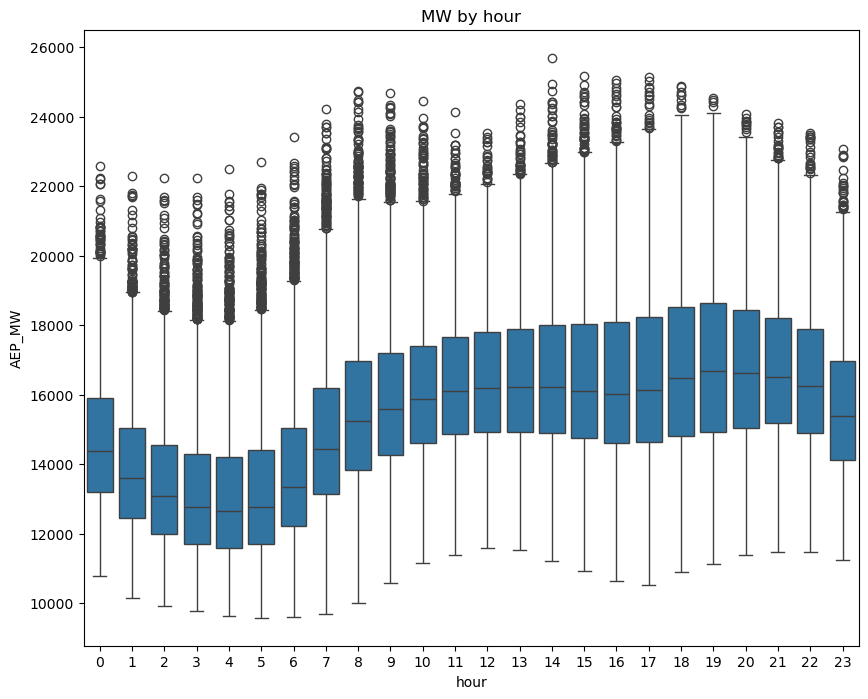

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df, x='hour', y='AEP_MW')
ax.set_title('MW by hour')
plt.show()

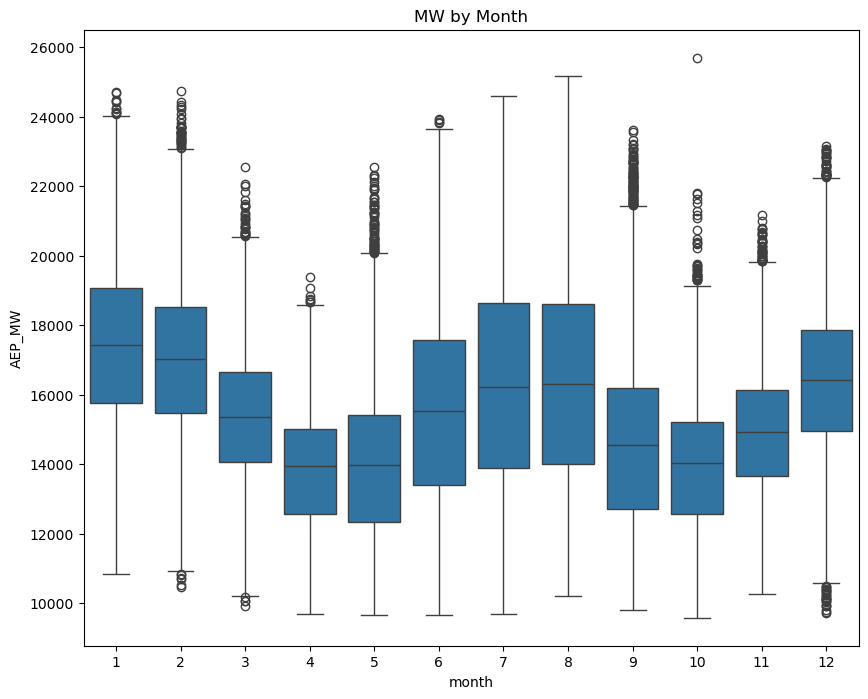

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df, x='month', y='AEP_MW')
ax.set_title('MW by Month')
plt.show()

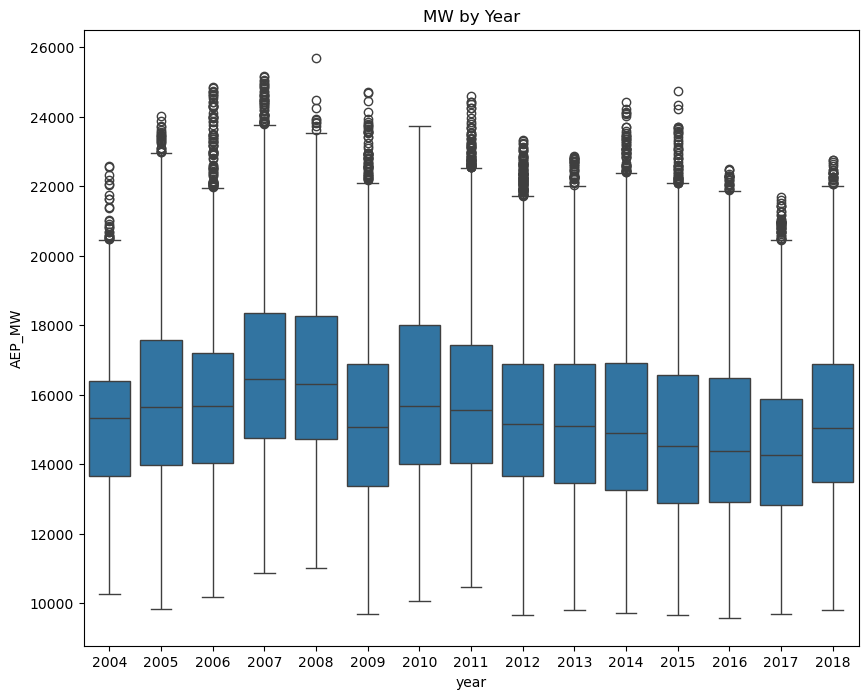

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df, x='year', y='AEP_MW')
ax.set_title('MW by Year')
plt.show()

# Modeling

In [42]:
# in order to evaluate the error we will be using MSE since it punishes more predictions that are way off the correct value

In [3]:
df = pd.read_csv('AEP_hourly.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

In [4]:
def create_features(df):
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek # monday = 0 , sunday = 6
    df['quarter'] = df['Datetime'].dt.quarter
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear

    return df

In [5]:
df = create_features(df)

In [6]:
df.head(5)

,Datetime,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
2183,2004-10-01 01:00:00,12379.0,1,4,4,10,2004,275
2184,2004-10-01 02:00:00,11935.0,2,4,4,10,2004,275
2185,2004-10-01 03:00:00,11692.0,3,4,4,10,2004,275
2186,2004-10-01 04:00:00,11597.0,4,4,4,10,2004,275
2187,2004-10-01 05:00:00,11681.0,5,4,4,10,2004,275


In [7]:
# train = df[df['Datetime'] < '01-01-2015']
train = df.loc[df['Datetime'] < '01-01-2015'].copy()

# test = df[df['Datetime'] >= '01-01-2015']
test = df.loc[df['Datetime'] >= '01-01-2015'].copy()

In [8]:
features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
target = 'AEP_MW'

In [9]:
X_train = train[features]
y_train = train[target]

In [10]:
X_test = test[features]
y_test = test[target]

In [11]:
model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100
)

[0]	validation_0-rmse:2114.60250	validation_1-rmse:2277.71995
[58]	validation_0-rmse:832.91143	validation_1-rmse:1821.05627


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate = 0.01)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100
)

[0]	validation_0-rmse:2557.05852	validation_1-rmse:2669.66874
[100]	validation_0-rmse:1667.99304	validation_1-rmse:1906.43321
[200]	validation_0-rmse:1388.41609	validation_1-rmse:1728.03964
[300]	validation_0-rmse:1260.06288	validation_1-rmse:1670.93868
[400]	validation_0-rmse:1170.54347	validation_1-rmse:1651.83339
[500]	validation_0-rmse:1113.48343	validation_1-rmse:1644.49126
[544]	validation_0-rmse:1091.83993	validation_1-rmse:1647.10973


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

# Feature Importance

In [13]:
feat_importances = pd.DataFrame(data = model.feature_importances_, index = model.feature_names_in_, columns = ['importance'])

<Axes: title={'center': 'Feature Importance'}>

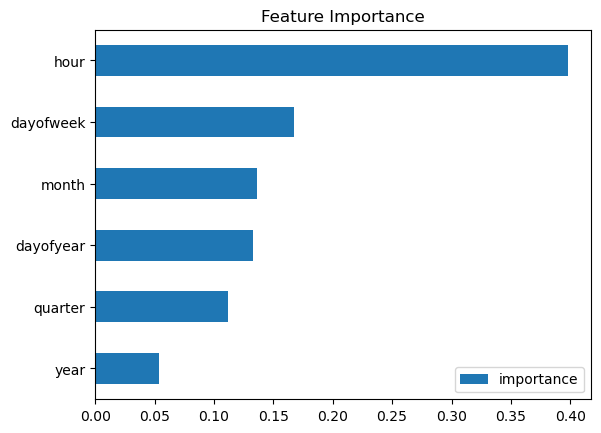

In [14]:
feat_importances.sort_values('importance').plot(kind='barh', title='Feature Importance')

# Forecast Test Set

In [15]:
test['prediction'] = model.predict(X_test)

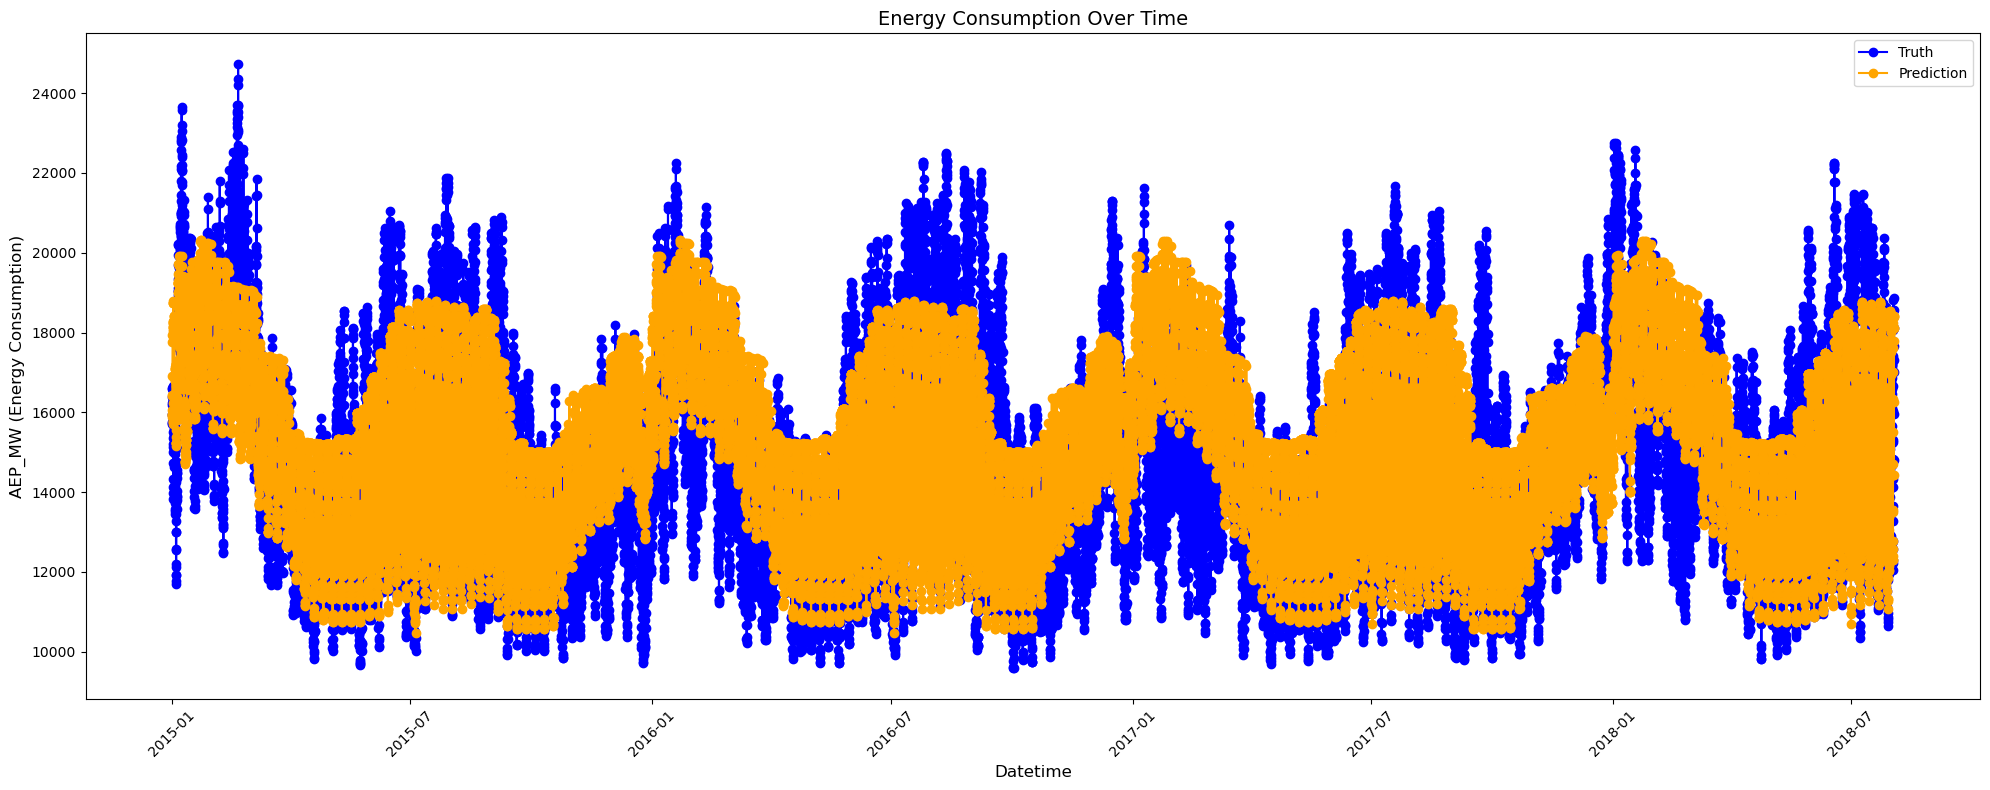

In [18]:
plt.figure(figsize=(20, 8))

# Plotting the time series
plt.plot(test['Datetime'], test['AEP_MW'], marker='o', linestyle='-', color='blue', label='Truth')
plt.plot(test['Datetime'], test['prediction'], marker = 'o', linestyle='-', color='orange', label='Prediction')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

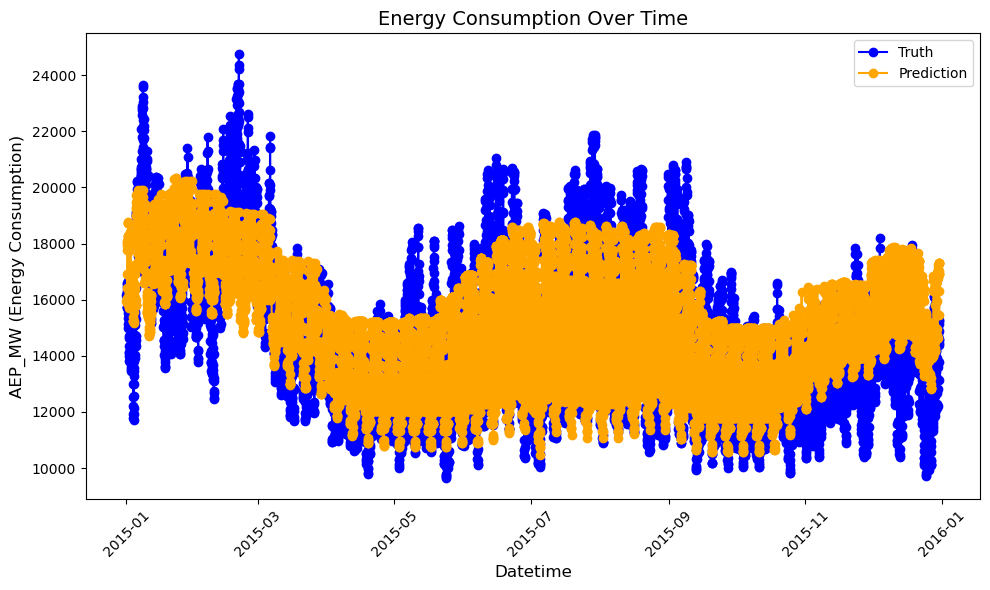

In [20]:
df_1year = test.loc[(df['Datetime']>'01-01-2015') & (df['Datetime']<='12-31-2015')]

plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df_1year['Datetime'], df_1year['AEP_MW'], marker='o', linestyle='-', color='blue', label='Truth')
plt.plot(df_1year['Datetime'], df_1year['prediction'], marker = 'o', linestyle='-', color='orange', label='Prediction')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

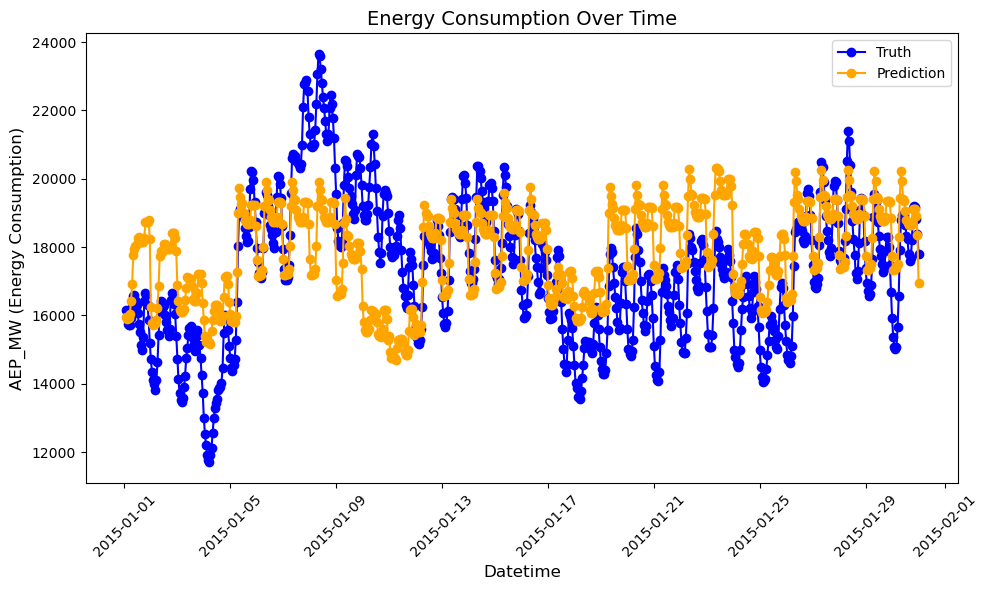

In [22]:
df_1month = test.loc[(df['Datetime']>'01-01-2015') & (df['Datetime']<='01-31-2015')]

plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df_1month['Datetime'], df_1month['AEP_MW'], marker='o', linestyle='-', color='blue', label='Truth')
plt.plot(df_1month['Datetime'], df_1month['prediction'], marker = 'o', linestyle='-', color='orange', label='Prediction')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

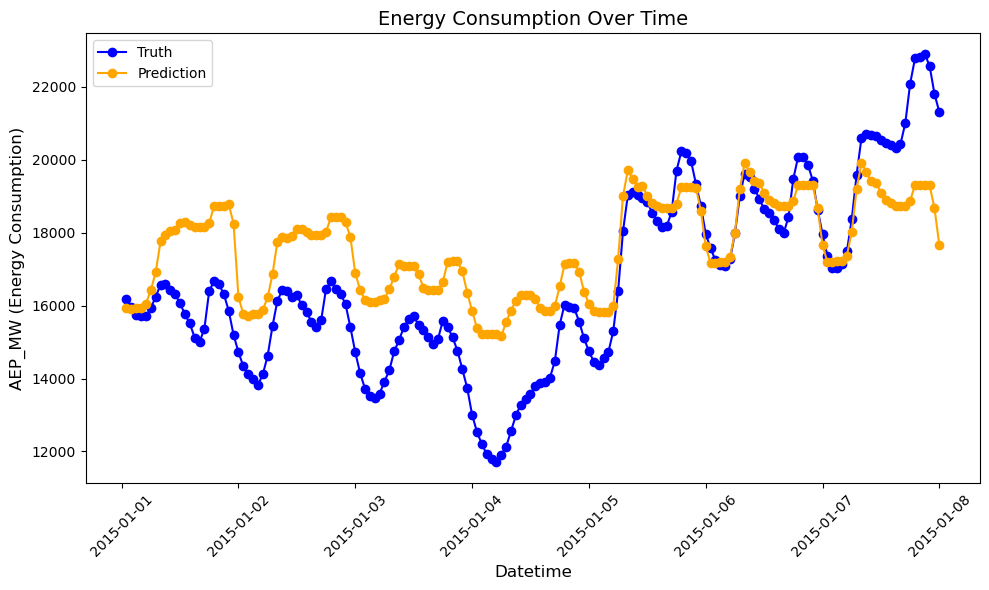

In [23]:
df_1week = test.loc[(df['Datetime']>'01-01-2015') & (df['Datetime']<='01-08-2015')]

plt.figure(figsize=(10, 6))

# Plotting the time series
plt.plot(df_1week['Datetime'], df_1week['AEP_MW'], marker='o', linestyle='-', color='blue', label='Truth')
plt.plot(df_1week['Datetime'], df_1week['prediction'], marker = 'o', linestyle='-', color='orange', label='Prediction')

# Adding titles and labels
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('AEP_MW (Energy Consumption)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [26]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))

score

np.float64(1644.3873400386153)

In [ ]:
#Testar cross validation (rolling set)